# Projecto de Neurociencias
## Clasificador de tumores de alto y bajo grado
### Integrantes del equipo: Alfonso Toriz Vázquez, Michelle Dubhé Mata Hernández, Xiao Wei Zhou, André Mendez Vera, Valeria Valenzuela López y Gerardo De Jesús Navarrete

#### Importamos las librerías

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import itk
import mahotas as mh
import os
from glob import glob
from itkwidgets import view
import json

#### Exploramos los archivos
Utilizaremos un diccionario para organizar los archivos en diferentes categorías:
* Grado del Tumor (HG, LG)
    * Número de Caso
        * Tipo de Imagen [Flair, T1, T1c, T2, Máscaras]

In [8]:
# Directorio base
path = "/home/atoriz98/Datasets/BrainGliomas/GliomasImages"

files = glob(path + "/**/*.mha", recursive = True)

# Dictionaries and list to organize files
Dataset = {'HG': {}, 'LG': {}}
id_HG = np.asarray([])
id_LG = np.asarray([])

# Image types
types = ['Flair', 'T1', 'T1c', 'T2', 'OT']

In [9]:
# Add cases names
for file in files:
    if 'HG' in file:
        id_HG = np.append(id_HG, file.split('/')[7])
    else:
        id_LG = np.append(id_LG, file.split('/')[7])
        
# Find all unique values of cases
for unique in np.unique(id_HG):
    Dataset['HG'][unique] = {}
    for img in types:
        Dataset['HG'][unique][img] = {}
for unique in np.unique(id_LG):
    Dataset['LG'][unique] = {}
    for img in types:
        Dataset['LG'][unique][img] = {}

# Fill Dataset dictionary accordingly    
for grade in Dataset.keys(): # HG LG
    for case in Dataset[grade].keys(): # Num
        for img in types: # Flair, Tc1, Tc2 ...
            for file in files:
                route = file.split('/')
                if route[6] == grade and route[7] == case and route[8].endswith(img):
                    Dataset[grade][case][img] = file

#### Imprimimos nuestro diccionario organizado

In [10]:
# Print Dataset for easy reading
print(json.dumps(Dataset, indent=4))

{
    "HG": {
        "0001": {
            "Flair": "/home/atoriz98/Datasets/BrainGliomas/GliomasImages/HG/0001/VSD.Brain.XX.O.MR_Flair/VSD.Brain.XX.O.MR_Flair.684.mha",
            "T1": "/home/atoriz98/Datasets/BrainGliomas/GliomasImages/HG/0001/VSD.Brain.XX.O.MR_T1/VSD.Brain.XX.O.MR_T1.685.mha",
            "T1c": "/home/atoriz98/Datasets/BrainGliomas/GliomasImages/HG/0001/VSD.Brain.XX.O.MR_T1c/VSD.Brain.XX.O.MR_T1c.686.mha",
            "T2": "/home/atoriz98/Datasets/BrainGliomas/GliomasImages/HG/0001/VSD.Brain.XX.O.MR_T2/VSD.Brain.XX.O.MR_T2.687.mha",
            "OT": "/home/atoriz98/Datasets/BrainGliomas/GliomasImages/HG/0001/VSD.Brain_3more.XX.XX.OT/VSD.Brain_3more.XX.XX.OT.6560.mha"
        },
        "0002": {
            "Flair": "/home/atoriz98/Datasets/BrainGliomas/GliomasImages/HG/0002/VSD.Brain.XX.O.MR_Flair/VSD.Brain.XX.O.MR_Flair.691.mha",
            "T1": "/home/atoriz98/Datasets/BrainGliomas/GliomasImages/HG/0002/VSD.Brain.XX.O.MR_T1/VSD.Brain.XX.O.MR_T1.692.mha",


#### Cargamos una imagen para observarla

In [11]:
img = itk.imread(Dataset['HG']['0001']['Flair'])

In [12]:
# Variable type
type(img)

itk.itkImagePython.itkImageSS3

In [13]:
# Convert to numpy array
np_img = itk.GetArrayFromImage(img)

In [14]:
# Variable type
type(np_img)

numpy.ndarray

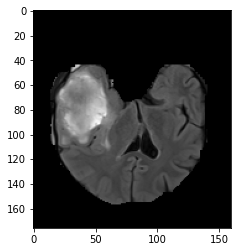

In [24]:
# Show Image
plt.imshow(np_img[:,90,:],cmap='gray')

In [25]:
# Mostramos el volumen
view(img)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageSS3; pr…

In [17]:
img2 = itk.imread(Dataset['LG']['0001']['Flair'])

In [18]:
view(img2)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageSS3; pr…